In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

Data Pre-Processing

1. Load the CSV into a DataFrame

In [165]:
df = pd.read_csv("imdb_top_movies.csv")

In [166]:
df.head()

,Title,Year,Rating,Genre,Director(s),Box Office Revenue,Lead Actors
0,1. The Shawshank Redemption,1994,9.3 (3M),"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...","Gross worldwide$29,332,133","Bob Gunton, Morgan Freeman, Tim Robbins"
1,2. The Godfather,1972,9.2 (2.1M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...","Gross worldwide$250,342,198","Al Pacino, Marlon Brando, James Caan"
2,3. The Dark Knight,2008,9.0 (3M),"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...","Gross worldwide$1,009,057,329","Aaron Eckhart, Christian Bale, Heath Ledger"
3,4. The Godfather Part II,1974,9.0 (1.4M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...","Gross worldwide$47,964,222","Al Pacino, Robert De Niro, Robert Duvall"
4,5. 12 Angry Men,1957,9.0 (917K),"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...","Gross worldwide$2,945","Henry Fonda, Martin Balsam, Lee J. Cobb"


2. Data Cleaning and Type Conversion

In [167]:
type(df)

pandas.core.frame.DataFrame

In [168]:
df.shape

(250, 7)

In [169]:
#Dropping Duplicates
df= df.drop_duplicates()
df

,Title,Year,Rating,Genre,Director(s),Box Office Revenue,Lead Actors
0,1. The Shawshank Redemption,1994,9.3 (3M),"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...","Gross worldwide$29,332,133","Bob Gunton, Morgan Freeman, Tim Robbins"
1,2. The Godfather,1972,9.2 (2.1M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...","Gross worldwide$250,342,198","Al Pacino, Marlon Brando, James Caan"
2,3. The Dark Knight,2008,9.0 (3M),"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...","Gross worldwide$1,009,057,329","Aaron Eckhart, Christian Bale, Heath Ledger"
3,4. The Godfather Part II,1974,9.0 (1.4M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...","Gross worldwide$47,964,222","Al Pacino, Robert De Niro, Robert Duvall"
4,5. 12 Angry Men,1957,9.0 (917K),"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...","Gross worldwide$2,945","Henry Fonda, Martin Balsam, Lee J. Cobb"
...,...,...,...,...,...,...,...
245,246. A Silent Voice: The Movie,2016,8.1 (117K),"Anime, Coming-of-Age, Psychological Drama, Shō...","Saori Hayami, Naoko Yamada, Lexi Marman, Shoko...","Gross worldwide$30,819,442","Miyu Irino, Saori Hayami, Aoi Yûki"
246,247. The Help,2011,8.1 (510K),"Period Drama, Drama","Hilly Holbrook, Emma Stone, Jerry Leiber, Tate...","Gross worldwide$221,802,186","Emma Stone, Octavia Spencer, Viola Davis"
247,248. Amores Perros,2000,8.0 (261K),"Tragedy, Drama, Thriller","Emilio Echevarría, Guillermo Arriaga, Alejandr...","Gross worldwide$20,908,467","Goya Toledo, Gael García Bernal, Emilio Echeva..."
248,249. Rebecca,1940,8.1 (153K),"Dark Romance, Psychological Drama, Psychologic...","Laurence Olivier, Mrs. Danvers, The Second Mrs...","Gross worldwide$113,328","Laurence Olivier, George Sanders, Joan Fontaine"


In [170]:
df.dtypes

Title                 object
Year                   int64
Rating                object
Genre                 object
Director(s)           object
Box Office Revenue    object
Lead Actors           object
dtype: object

In [171]:
# 1. Split "Title" into "ID" and "Movie Title

# Add new columns "ID" and "Movie Title" to DataFrame
df["ID"] = id_title["ID"]
df["Movie Title"] = id_title["MovieTitle"].fillna(df["Title"]).str.strip()

# Remove the old "Title" column
df.drop(columns=["Title"], inplace=True)
df.head()

,Year,Rating,Genre,Director(s),Box Office Revenue,Lead Actors,ID,Movie Title
0,1994,9.3 (3M),"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...","Gross worldwide$29,332,133","Bob Gunton, Morgan Freeman, Tim Robbins",1,The Shawshank Redemption
1,1972,9.2 (2.1M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...","Gross worldwide$250,342,198","Al Pacino, Marlon Brando, James Caan",2,The Godfather
2,2008,9.0 (3M),"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...","Gross worldwide$1,009,057,329","Aaron Eckhart, Christian Bale, Heath Ledger",3,The Dark Knight
3,1974,9.0 (1.4M),"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...","Gross worldwide$47,964,222","Al Pacino, Robert De Niro, Robert Duvall",4,The Godfather Part II
4,1957,9.0 (917K),"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...","Gross worldwide$2,945","Henry Fonda, Martin Balsam, Lee J. Cobb",5,12 Angry Men


In [172]:
# 1. Split "Rating" into separate columns for rating and viewers
extracted = df["Rating"].str.extract(r"^(.*?)\s*\((.*?)\)$")

# If the rating string has parentheses, group(1) is the rating part, group(2) is the viewers part.
df["Rating (raw)"] = extracted[0].fillna(df["Rating"])  # Fall back to original if no parentheses
df["Viewers"] = extracted[1]                            # This will be NaN if there's no match

# Convert "Rating (raw)" to numeric, coercing invalid entries to NaN
df["Rating (raw)"] = pd.to_numeric(df["Rating (raw)"], errors="coerce")

# Remove the old "Rating" column
df.drop(columns=["Rating"], inplace=True)

# Parse the "Viewers" column (e.g., "3.5M" -> 3,500,000; "500K" -> 500,000)
def parse_viewers(value):
    if pd.isna(value):
        return np.nan
    val_str = str(value).strip().upper()  # e.g., "3.5M" -> "3.5M"
    
    # Match a pattern like "3.5M" or "500K"
    match = re.match(r"^(\d+(\.\d+)?)([MK])$", val_str)
    if match:
        number_part = float(match.group(1))  # "3.5" or "500"
        suffix = match.group(3)             # "M" or "K"
        
        if suffix == "M":
            return number_part * 1_000_000
        elif suffix == "K":
            return number_part * 1_000
    
    return np.nan  # If it doesn't match our pattern, treat as unknown

df["Viewers"] = df["Viewers"].apply(parse_viewers)

# Inspect the cleaned columns
print(df[["Rating (raw)", "Viewers"]].head())

   Rating (raw)    Viewers
0           9.3  3000000.0
1           9.2  2100000.0
2           9.0  3000000.0
3           9.0  1400000.0
4           9.0   917000.0


In [173]:
# 3. Clean the "Box Office Revenue" column

df["Box Office Revenue"] = df["Box Office Revenue"].str.replace("Gross worldwide", "", regex=False)
df["Box Office Revenue"] = df["Box Office Revenue"].str.replace("$", "", regex=False)
df["Box Office Revenue"] = df["Box Office Revenue"].str.replace(",", "", regex=False)
df["Box Office Revenue"] = pd.to_numeric(df["Box Office Revenue"], errors="coerce")
df.head()

,Year,Genre,Director(s),Box Office Revenue,Lead Actors,ID,Movie Title,Rating (raw),Viewers
0,1994,"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...",2.933213e+07,"Bob Gunton, Morgan Freeman, Tim Robbins",1,The Shawshank Redemption,9.3,3000000.0
1,1972,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...",2.503422e+08,"Al Pacino, Marlon Brando, James Caan",2,The Godfather,9.2,2100000.0
2,2008,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...",1.009057e+09,"Aaron Eckhart, Christian Bale, Heath Ledger",3,The Dark Knight,9.0,3000000.0
3,1974,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...",4.796422e+07,"Al Pacino, Robert De Niro, Robert Duvall",4,The Godfather Part II,9.0,1400000.0
4,1957,"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...",2.945000e+03,"Henry Fonda, Martin Balsam, Lee J. Cobb",5,12 Angry Men,9.0,917000.0


In [174]:
# Remove the "ID" column
df.drop(columns=["ID"], inplace=True)
df.head()

,Year,Genre,Director(s),Box Office Revenue,Lead Actors,Movie Title,Rating (raw),Viewers
0,1994,"Epic, Period Drama, Prison Drama, Drama","The Ink Spots, Jack Lawrence, Stephen King, Ti...",2.933213e+07,"Bob Gunton, Morgan Freeman, Tim Robbins",The Shawshank Redemption,9.3,3000000.0
1,1972,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Marlon Brando, Peter Clemenza, Al ...",2.503422e+08,"Al Pacino, Marlon Brando, James Caan",The Godfather,9.2,2100000.0
2,2008,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...",1.009057e+09,"Aaron Eckhart, Christian Bale, Heath Ledger",The Dark Knight,9.0,3000000.0
3,1974,"Epic, Gangster, Tragedy, Crime, Drama","Mario Puzo, Francesco Pennino, Al Pacino, Robe...",4.796422e+07,"Al Pacino, Robert De Niro, Robert Duvall",The Godfather Part II,9.0,1400000.0
4,1957,"Legal Drama, Psychological Drama, Crime, Drama","Henry Fonda, Jack Warden, Lee J. Cobb, Juror #...",2.945000e+03,"Henry Fonda, Martin Balsam, Lee J. Cobb",12 Angry Men,9.0,917000.0


In [175]:
df.dtypes

Year                    int64
Genre                  object
Director(s)            object
Box Office Revenue    float64
Lead Actors            object
Movie Title            object
Rating (raw)          float64
Viewers               float64
dtype: object

In [176]:
#Null Value check

df.isna().sum()

Year                  0
Genre                 0
Director(s)           0
Box Office Revenue    3
Lead Actors           0
Movie Title           0
Rating (raw)          0
Viewers               0
dtype: int64

In [177]:
# Remove rows with missing values in "Box Office Revenue"
df.dropna(subset=["Box Office Revenue"], inplace=True)

In [178]:
# As per the assignment request, last 2 decades data has been considered. 
df = df[(df["Year"] >= 2004) & (df["Year"] <= 2024)]

In [179]:
# 4.Save the cleaned dataset

df.to_csv("imdb_top_movies_cleaned.csv", index=False)

In [187]:
df.head()

,Year,Genre,Director(s),Box Office Revenue,Lead Actors,Movie Title,Rating (raw),Viewers
2,2008,"Action Epic, Epic, Superhero, Tragedy, Action,...","Aaron Eckhart, Michael Caine, The Joker, Jonat...",1.009057e+09,"Aaron Eckhart, Christian Bale, Heath Ledger",The Dark Knight,9.0,3000000.0
13,2010,"Action Epic, Adventure Epic, Epic, Psychologic...","Cobb, Joseph Gordon-Levitt, Leonardo DiCaprio,...",8.390306e+08,"Joseph Gordon-Levitt, Leonardo DiCaprio, Ellio...",Inception,8.8,2700000.0
18,2014,"Adventure Epic, Epic, Quest, Sci-Fi Epic, Spac...","Jonathan Nolan, Cooper, Matthew McConaughey, K...",7.584647e+08,"Anne Hathaway, Jessica Chastain, Matthew McCon...",Interstellar,8.7,2300000.0
33,2019,"Dark Comedy, Korean Drama, Psychological Thril...","Song Kang-ho, Bong Joon Ho, Han Jin-won, Cho Y...",2.626081e+08,"Song Kang-ho, Cho Yeo-jeong, Lee Sun-kyun",Parasite,8.5,1000000.0
37,2006,"Cop Drama, Epic, Gangster, Crime, Drama, Thriller","Felix Chong, Matt Damon, Dignam, William Monah...",2.914814e+08,"Matt Damon, Leonardo DiCaprio, Jack Nicholson",The Departed,8.5,1500000.0


3- Perform Statistical Analysis

In [180]:
print("\n=== Descriptive Statistics ===")
df.describe()


=== Descriptive Statistics ===


,Year,Box Office Revenue,Rating (raw),Viewers
count,83.000000,8.300000e+01,83.000000,8.300000e+01
mean,2012.795181,3.933943e+08,8.269880,7.958916e+05
std,5.851327,5.079335e+08,0.189823,5.936496e+05
min,2004.000000,6.735800e+04,8.000000,3.100000e+04
25%,2008.000000,4.855526e+07,8.100000,3.665000e+05
50%,2012.000000,2.218022e+08,8.200000,7.210000e+05
75%,2017.000000,5.111418e+08,8.400000,1.100000e+06
max,2024.000000,2.799439e+09,9.000000,3.000000e+06


In [189]:
""" 
INSIGHT: 
    - Revenue Skewed: The large spread in revenue (from thousands to billions) highlights that a few blockbuster films dominate box office earnings.
    - Highly Rated Movies: All movies have ratings above 8.0, making them critically acclaimed and audience favorites.
    - Diverse Audience Engagement: The number of user ratings varies widely, suggesting that while some films have cult followings, others are more widely viewed. 
"""

' \nINSIGHT: \n    - Revenue Skewed: The large spread in revenue (from thousands to billions) highlights that a few blockbuster films dominate box office earnings.\n    - Highly Rated Movies: All movies have ratings above 8.0, making them critically acclaimed and audience favorites.\n    - Diverse Audience Engagement: The number of user ratings varies widely, suggesting that while some films have cult followings, others are more widely viewed. \n'

In [181]:
# Identify outliers using the IQR method for Box Office Revenue
q1_rev = df["Box Office Revenue"].quantile(0.25)
q3_rev = df["Box Office Revenue"].quantile(0.75)
iqr_rev = q3_rev - q1_rev
lower_bound_rev = q1_rev - 1.5 * iqr_rev
upper_bound_rev = q3_rev + 1.5 * iqr_rev

outliers_rev = df[(df["Box Office Revenue"] < lower_bound_rev) | (df["Box Office Revenue"] > upper_bound_rev)]
print("\n=== Outliers in Box Office Revenue ===")
print(outliers_rev[["Movie Title", "Year", "Box Office Revenue"]])


=== Outliers in Box Office Revenue ===
                                      Movie Title  Year  Box Office Revenue
60                         Avengers: Infinity War  2018        2.052415e+09
74                              Avengers: Endgame  2019        2.799439e+09
144                             Top Gun: Maverick  2022        1.495696e+09
177  Harry Potter and the Deathly Hallows: Part 2  2011        1.342500e+09
181                       Spider-Man: No Way Home  2021        1.952732e+09


In [190]:
"""
Insights from Box Office Revenue Outliers
    - The movies listed here are considered outliers in box office revenue, meaning their earnings are significantly higher than most other films in the dataset. 
    - This provides key insights into industry trends and audience preferences.
    - All movies in the outliers list grossed over $1.3 billion, far exceeding the typical box office earnings of most top-rated movies.
    - The earliest movie in this list is from 2011, and four out of five are from 2018 or later.
    - This highlights the rise of global box office records in the streaming era, where studios rely on big-budget movies to drive ticket sales.
    - All five movies belong to major film franchises (Marvel, Harry Potter, Top Gun).
    - This suggests that sequels, adaptations, and franchise films dominate the highest revenue tiers.
"""

'\nInsights from Box Office Revenue Outliers\n    - The movies listed here are considered outliers in box office revenue, meaning their earnings are significantly higher than most other films in the dataset. \n    - This provides key insights into industry trends and audience preferences.\n    - All movies in the outliers list grossed over $1.3 billion, far exceeding the typical box office earnings of most top-rated movies.\n    - The earliest movie in this list is from 2011, and four out of five are from 2018 or later.\n    - This highlights the rise of global box office records in the streaming era, where studios rely on big-budget movies to drive ticket sales.\n    - All five movies belong to major film franchises (Marvel, Harry Potter, Top Gun).\n    - This suggests that sequels, adaptations, and franchise films dominate the highest revenue tiers.\n'

In [182]:
# Identify outliers using the IQR method for Ratings
q1_rate = df["Rating (raw)"].quantile(0.25)
q3_rate = df["Rating (raw)"].quantile(0.75)
iqr_rate = q3_rate - q1_rate
lower_bound_rate = q1_rate - 1.5 * iqr_rate
upper_bound_rate = q3_rate + 1.5 * iqr_rate

outliers_rate = df[(df["Rating (raw)"] < lower_bound_rate) | (df["Rating (raw)"] > upper_bound_rate)]
print("\n=== Outliers in Ratings ===")
print(outliers_rate[["Movie Title", "Year", "Rating (raw)"]])


=== Outliers in Ratings ===
       Movie Title  Year  Rating (raw)
2  The Dark Knight  2008           9.0


In [191]:
"""
INSIGHTS:
    - The Dark Knight (2008) has an IMDb rating of 9.0, making it an outlier among the top-rated movies in the dataset.
    - Given that the median rating in the dataset is 8.2, this film significantly surpasses typical high-rated movies.
    - This suggests that even among the top movies, The Dark Knight stands above the rest in terms of audience reception.
"""

'\nINSIGHTS:\n    - The Dark Knight (2008) has an IMDb rating of 9.0, making it an outlier among the top-rated movies in the dataset.\n    - Given that the median rating in the dataset is 8.2, this film significantly surpasses typical high-rated movies.\n    - This suggests that even among the top movies, The Dark Knight stands above the rest in terms of audience reception.\n'

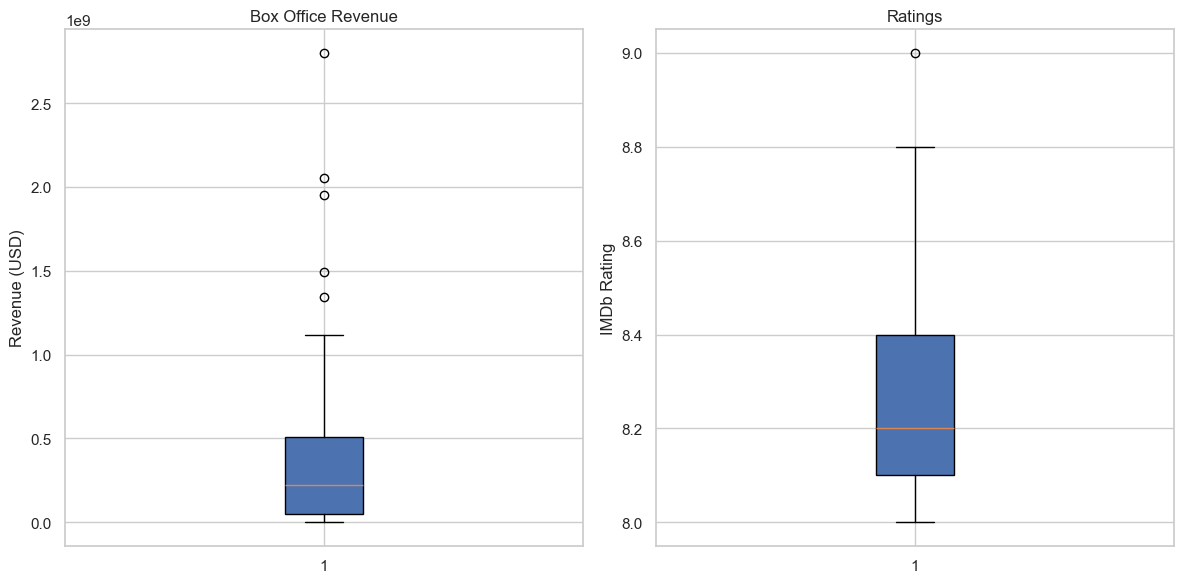

In [183]:
# Plot Boxplots for Box Office Revenue and Ratings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(df["Box Office Revenue"].dropna(), vert=True, patch_artist=True)
plt.title("Box Office Revenue")
plt.ylabel("Revenue (USD)")

plt.subplot(1, 2, 2)
plt.boxplot(df["Rating (raw)"].dropna(), vert=True, patch_artist=True)
plt.title("Ratings")
plt.ylabel("IMDb Rating")

plt.tight_layout()
plt.show()

4- Data visualization

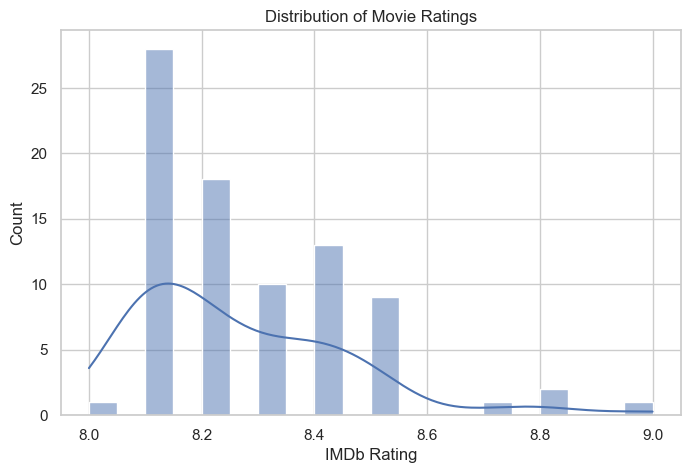

In [184]:
sns.set(style="whitegrid")

# Histogram for Movie Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["Rating (raw)"], bins=20, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("IMDb Rating")
plt.ylabel("Count")
plt.show()

In [192]:
"""
Insights from the Distribution of Movie Ratings:
    The histogram shows a right-skewed distribution, meaning most movies have ratings between 8.0 and 8.4.
    The highest frequency is around 8.1 - 8.2, suggesting that this is the most common rating range for top movies in the dataset.
    Very few movies have ratings above 8.6, indicating that it's difficult for a movie to achieve an IMDb rating in the upper 8s and 9.0+.
    Since all movies in the dataset are highly rated (minimum 8.0), the distribution lacks lower ratings, making it a biased sample of only the best films.
"""

"\nInsights from the Distribution of Movie Ratings:\n    The histogram shows a right-skewed distribution, meaning most movies have ratings between 8.0 and 8.4.\n    The highest frequency is around 8.1 - 8.2, suggesting that this is the most common rating range for top movies in the dataset.\n    Very few movies have ratings above 8.6, indicating that it's difficult for a movie to achieve an IMDb rating in the upper 8s and 9.0+.\n    Since all movies in the dataset are highly rated (minimum 8.0), the distribution lacks lower ratings, making it a biased sample of only the best films.\n"

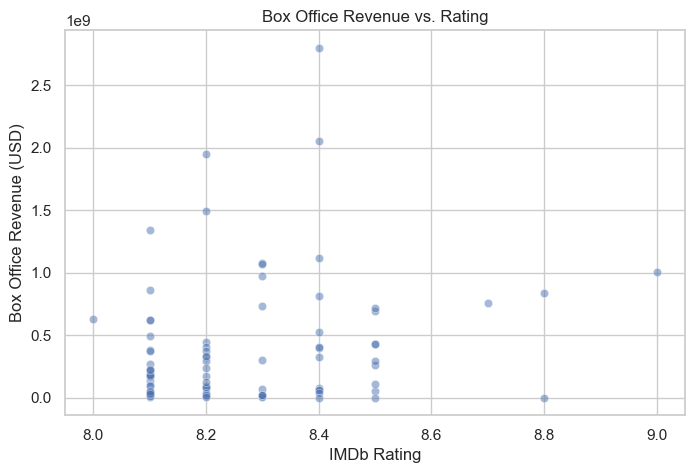

In [185]:
# Scatter plot for Revenue vs. Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Rating (raw)"], y=df["Box Office Revenue"], alpha=0.5)
plt.title("Box Office Revenue vs. Rating")
plt.xlabel("IMDb Rating")
plt.ylabel("Box Office Revenue (USD)")
plt.show()

In [193]:
"""
INSIGHTS:
    - The scatter plot does not show a clear upward or downward trend, suggesting that higher IMDb ratings do not necessarily lead to higher box office revenue.
    - Movies with similar ratings (8.0 - 8.5) have widely varying revenues, from modest earnings to over $2 billion.
    - Some of the highest-grossing movies (above $1.5 billion) have ratings between 8.2 - 8.5, rather than being the absolute highest-rated films.
    - The Dark Knight (9.0) appears on the chart with strong revenue, but it is not the highest-grossing movie.
    - Many movies rated 8.6+ do not reach extreme box office earnings, reinforcing that critical acclaim does not always translate to commercial success.
    - A significant concentration of movies falls under $500 million, regardless of rating.
    -This suggests that most top-rated movies are not billion-dollar blockbusters, and high revenue is an exception rather than the norm.

"""

'\nINSIGHTS:\n    - The scatter plot does not show a clear upward or downward trend, suggesting that higher IMDb ratings do not necessarily lead to higher box office revenue.\n    - Movies with similar ratings (8.0 - 8.5) have widely varying revenues, from modest earnings to over $2 billion.\n    - Some of the highest-grossing movies (above $1.5 billion) have ratings between 8.2 - 8.5, rather than being the absolute highest-rated films.\n    - The Dark Knight (9.0) appears on the chart with strong revenue, but it is not the highest-grossing movie.\n    - Many movies rated 8.6+ do not reach extreme box office earnings, reinforcing that critical acclaim does not always translate to commercial success.\n    - A significant concentration of movies falls under $500 million, regardless of rating.\n    -This suggests that most top-rated movies are not billion-dollar blockbusters, and high revenue is an exception rather than the norm.\n\n'

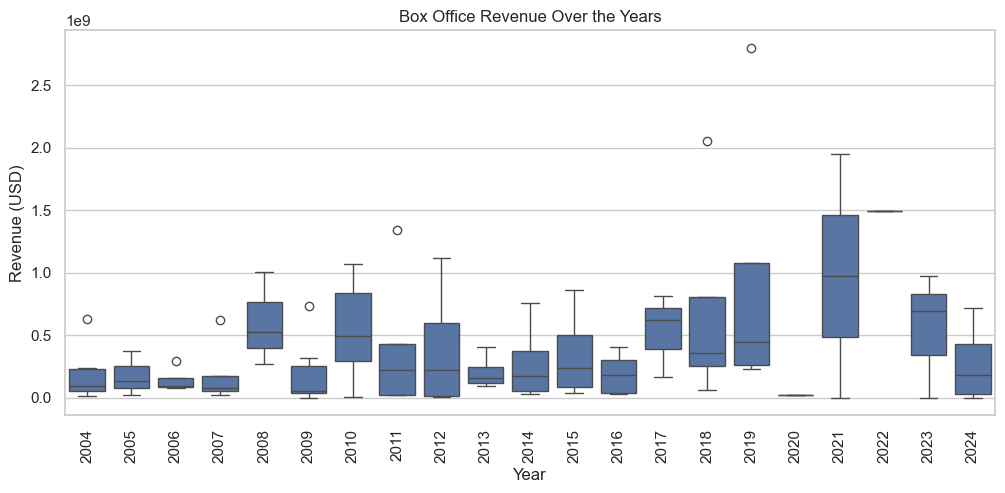

In [186]:
# Boxplot for Revenue by Year
plt.figure(figsize=(12, 5))
sns.boxplot(x=df["Year"], y=df["Box Office Revenue"])
plt.xticks(rotation=90)
plt.title("Box Office Revenue Over the Years")
plt.xlabel("Year")
plt.ylabel("Revenue (USD)")
plt.show()

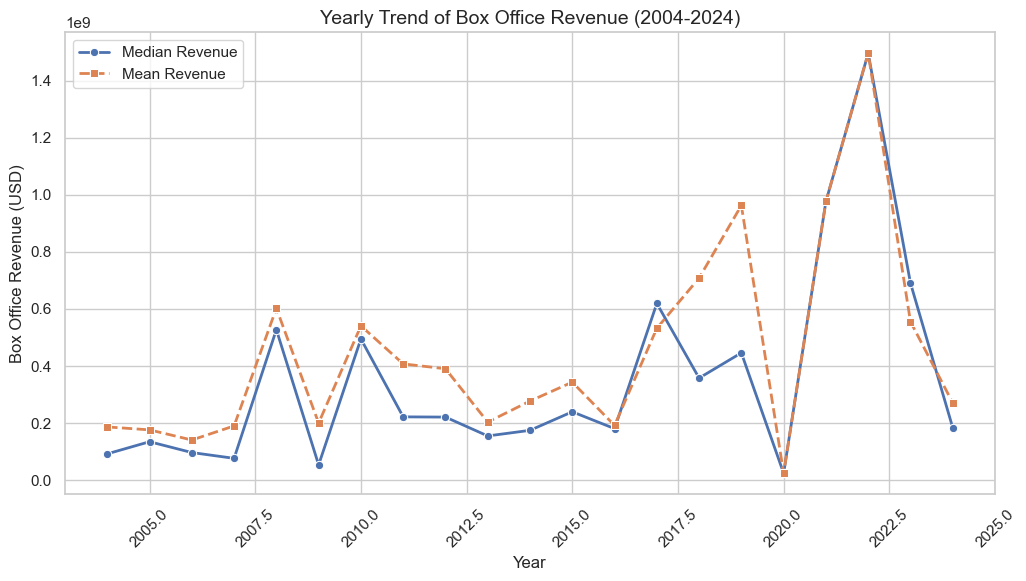

In [194]:
# Group data by year and calculate mean and median revenue
yearly_revenue = df.groupby("Year")["Box Office Revenue"].agg(["median", "mean"])

# Plot the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_revenue, x=yearly_revenue.index, y="median", marker="o", label="Median Revenue", linewidth=2)
sns.lineplot(data=yearly_revenue, x=yearly_revenue.index, y="mean", marker="s", label="Mean Revenue", linewidth=2, linestyle="dashed")

# Chart title and labels
plt.title("Yearly Trend of Box Office Revenue (2004-2024)", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Box Office Revenue (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

plt.show()

In [195]:
"""
INSIGHTS:

    - The median revenue has generally increased from 2004 to 2024, indicating that movies are making more money at the box office in recent years.
    - From 2010 onward, multiple years show outliers crossing the $1 billion+ range, especially in 2018, 2019, and 2021.
    - COVID-19 Impact in 2020:
        -2020 has a near-flat box plot, showing that almost all movies in that year had significantly lower earnings.
        - The COVID-19 pandemic led to widespread theater closures, reduced audience turnout, and streaming releases, resulting in a historically low box office year.
        - However, 2021 saw a sharp rebound, with major hits like Spider-Man: No Way Home surpassing $1.9 billion.
    - Some movies are breaking records, while others still struggle, suggesting a greater gap between blockbuster hits and lower-performing films.
    - Box office revenue appears moderately strong, but not as high as pre-pandemic years (2018-2019), suggesting that while theaters have recovered, 
    the growth of streaming platforms and changes in audience behavior may be influencing box office performance.

"""

'\nINSIGHTS:\n\n    - The median revenue has generally increased from 2004 to 2024, indicating that movies are making more money at the box office in recent years.\n    - From 2010 onward, multiple years show outliers crossing the $1 billion+ range, especially in 2018, 2019, and 2021.\n    - COVID-19 Impact in 2020:\n        -2020 has a near-flat box plot, showing that almost all movies in that year had significantly lower earnings.\n        - The COVID-19 pandemic led to widespread theater closures, reduced audience turnout, and streaming releases, resulting in a historically low box office year.\n        - However, 2021 saw a sharp rebound, with major hits like Spider-Man: No Way Home surpassing $1.9 billion.\n    - Some movies are breaking records, while others still struggle, suggesting a greater gap between blockbuster hits and lower-performing films.\n    - Box office revenue appears moderately strong, but not as high as pre-pandemic years (2018-2019), suggesting that while theat